### Explore the data-files in the repository and familiarize with pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Make a map that assigns the total number of memory operations per element to a given algorithm

In [2]:
memops = {'scal':2, 'axpby':3, 'pointwiseDot':6, 'dot':2, 'dx':3, 'dy':3,'dz':3,
         'arakawa':34, 'cg':51, 'ds':83}

Now, let's read in one of the csv files (actually they are "whitespace seperated values") and compute the bandwidth from the time measurements, vector size and the memory operations

In [3]:
#read in csv file
df1 = pd.read_csv('benchmark_skl_mpi8.csv', delimiter=' ')
#add size and get rid of non-relevant columns
df1.insert(0,'size', 8*df1['n']*df1['n']*df1['Nx']*df1['Ny']*df1['Nz']/1e6)
for name, mem in memops.items():
    df1[name] = df1['size']/1000*mem/df1[name]
dfr = df1[['n','Nx','Ny','Nz','size']+list(memops.keys())]
dfr

,n,Nx,Ny,Nz,size,scal,axpby,pointwiseDot,dot,dx,dy,dz,arakawa,cg,ds
0,3,36,36,16,1.492992,661.951548,1039.634930,1700.107610,61.465041,120.726140,63.110747,1131.017416,229.149827,205.585759,56.426031
1,3,36,36,32,2.985984,1388.484261,2201.073760,2756.594028,121.752909,169.627019,125.551016,1831.903263,304.847779,323.206452,61.121196
2,3,36,36,64,5.971968,2778.506010,3911.752350,4250.269024,224.045139,244.827038,203.705097,3412.566143,415.994493,487.703532,57.598795
3,3,36,36,128,11.943936,4710.534079,6903.517090,5445.273884,363.584603,383.059511,342.750359,4581.996463,579.256874,656.331637,59.572185
4,3,72,72,16,5.971968,2715.259092,3930.167421,4109.637721,214.555044,309.581848,251.311960,1800.305680,484.599992,574.423715,258.821037
5,3,72,72,32,11.943936,4638.565858,6775.906749,5368.423040,334.981588,371.121781,357.992307,3653.123503,719.245328,779.569424,132.838259
6,3,72,72,64,23.887872,7633.749355,9774.928288,6272.526565,540.386018,605.614846,532.581366,6109.326013,941.099451,1027.374704,256.972028
7,3,72,72,128,47.775744,10959.033923,13521.309422,6974.798752,698.572813,705.833380,652.198908,8280.407644,990.092401,1195.278340,179.545441
8,3,144,144,16,23.887872,7075.780990,9816.422707,5712.250988,489.211846,652.127689,615.413026,5701.434913,1141.819527,1112.199850,745.606101
9,3,144,144,32,47.775744,11650.347249,14378.331267,7003.238663,733.139122,922.786711,842.313554,7012.232725,1261.582124,1376.503688,749.257760


We want to aggregate the results with the same input parameters n, Nx, Ny, Nz

In [4]:
#compute mean and standard derivation of 'same' groups 
dfr=dfr.groupby(['n', 'Nx','Ny','Nz','size']).agg(['mean', 'std'])
dfr=dfr.reset_index(level=['n','Nx','Ny','Nz','size'])

In [5]:
dfr['axpby']

,mean,std
0,1067.944475,54.692354
1,2157.785494,65.708427
2,3853.129954,125.915339
3,6678.035522,559.975786
4,3887.091576,120.479406
5,6415.221070,992.841291
6,8681.067851,1645.954341
7,13800.411231,184.937446
8,9643.711343,759.217430
9,14541.169764,2534.951298


Here, we compute the efficiency of the operations

In [6]:
base_bandwidth = dfr[('axpby','mean')].iloc[15] # base bandwidth at 3 256 256 128
for name, mem in memops.items():
    dfr[(name,'eff')]= dfr[(name,'mean')]/base_bandwidth
    dfr[(name,'eff_err')]=dfr[(name,'std')]/base_bandwidth
#now display all bandwidth results

In [7]:
cols=[(m,'eff') for m in memops.keys()]
efficiency=dfr[['n','Nx','Ny','Nz','size']].join( dfr[cols])
cols=[(m,'eff_err') for m in memops.keys()]
efficiency=efficiency.join( dfr[cols])
#dfr=dfr.sort_values(by='size')
#efficiency=efficiency.set_index('size')

In [8]:
pd.set_option('precision',2)
efficiency=efficiency.sort_values(by='size')
#efficiency.loc[:,'size']
efficiency.iloc[0:20]

,n,Nx,Ny,Nz,size,scal,axpby,pointwiseDot,dot,dx,...,scal,axpby,pointwiseDot,dot,dx,dy,dz,arakawa,cg,ds
,,,,,,eff,eff,eff,eff,eff,...,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err
0,3,36,36,16,1.49,0.33,0.52,0.84,0.03,0.06,...,0.01,0.03,0.03,3.02e-03,3.55e-03,3.49e-03,0.05,2.91e-03,3.96e-03,7.40e-04
16,4,36,36,16,2.65,0.56,0.90,1.21,0.05,0.07,...,0.05,0.04,0.06,2.77e-03,3.67e-03,2.85e-03,0.06,4.73e-03,1.08e-02,2.00e-03
1,3,36,36,32,2.99,0.64,1.05,1.37,0.06,0.08,...,0.05,0.03,0.08,1.67e-03,5.00e-03,3.31e-03,0.14,7.53e-03,1.72e-03,7.43e-04
17,4,36,36,32,5.31,1.14,1.62,1.85,0.09,0.09,...,0.09,0.25,0.11,2.06e-03,4.59e-03,2.40e-03,0.09,2.61e-03,2.39e-03,9.24e-04
2,3,36,36,64,5.97,1.30,1.87,2.01,0.10,0.11,...,0.04,0.06,0.06,2.79e-03,6.35e-03,4.96e-03,0.10,3.36e-03,4.86e-03,3.09e-04
4,3,72,72,16,5.97,1.30,1.88,2.00,0.10,0.15,...,0.05,0.06,0.03,6.18e-03,4.58e-03,5.74e-03,0.03,2.29e-02,2.26e-03,1.77e-02
18,4,36,36,64,10.62,2.05,2.78,2.24,0.16,0.15,...,0.18,0.38,0.32,4.04e-03,3.15e-03,8.20e-03,0.10,4.41e-03,3.15e-03,9.36e-04
20,4,72,72,16,10.62,2.12,3.03,2.49,0.15,0.15,...,0.05,0.07,0.22,1.10e-02,2.96e-02,4.41e-03,0.10,4.50e-03,2.48e-03,5.68e-03
3,3,36,36,128,11.94,2.05,3.24,2.83,0.16,0.18,...,0.72,0.27,0.55,4.85e-02,6.66e-03,7.43e-03,0.07,4.67e-03,1.34e-02,6.57e-04


Let us try and make our first plot

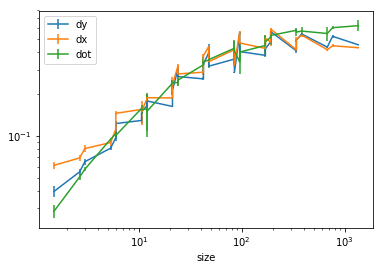

In [9]:
fig=plt.figure()
#print(efficiency)
toPlot=efficiency['dy'].join(efficiency['size'])
ax = toPlot.plot(style='ro',x='size',y='eff',yerr='eff_err')
toPlot=efficiency['dx'].join(efficiency['size'])
ax = toPlot.plot(style='ro',x='size',y='eff',yerr='eff_err',ax=ax)
toPlot=efficiency['dot'].join(efficiency['size'])
ax = toPlot.plot(style='ro',x='size',y='eff',yerr='eff_err',ax=ax)
plt.xscale('log')
plt.yscale('log')
ax.legend(['dy','dx','dot'])

/usr/lib/python3/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


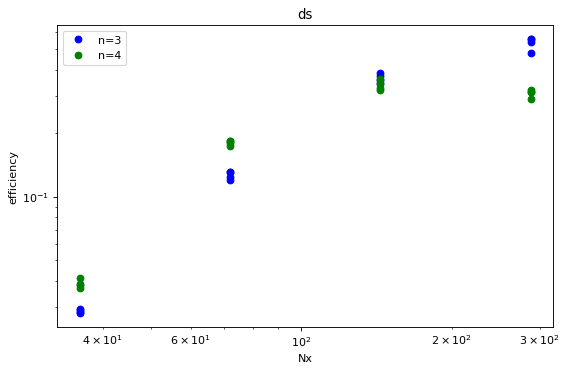

In [10]:
fig,ax=plt.subplots(1,1,figsize=(8,5),dpi= 80, facecolor='w', edgecolor='k')
plotlist = [('ds','eff')]
stylelist = ['ro','bo','go','yo']
#efficiency.iloc[8:24].plot(x=('size',''),y=[('cg','eff'),('arakawa','eff')],style=['ro','bo'],logx=True)
efficiency[efficiency['n']==3].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[1])
efficiency[efficiency['n']==4].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[2])
#plt.loglog()
plt.title(plotlist[0][0])
plt.xscale('log')
plt.yscale('log')
plt.ylabel('efficiency')
plt.xlabel('Nx')
plt.legend(['n=3','n=4'])
plt.show()
#base_bandwidth